In [1]:
import matplotlib.pyplot as plt
import numpy as np

Physical parameters

In [2]:
l=10 # m
g=9.8 # m/s^2

Canvas for the diagram

In [3]:
q=np.linspace(-4.0,8.0,60)
qdot=np.linspace(-3,3,25)
Q,Qdot=np.meshgrid(q,qdot) # plane phase grid
dot_Q,dot_Qdot=np.zeros(Q.shape), np.zeros(Qdot.shape)
NI,NJ=Q.shape

Auxiliary function for the integration of the system of first order differential equations

In [4]:
def derivatives(S,t):
  # S is an array with two components, the first is theta and the second is thetadot
  dthetadt=S[1]
  dthetadotdt=-(g/l)*np.sin(S[0])
  return np.array([dthetadt,dthetadotdt])

Construction of the vector field in phase space defined by the system of equations

In [5]:
for i in range (NI):
  for j in range (NJ):
    dot_phase_plane=derivatives([Q[i,j],Qdot[i,j]],0.0)
    dot_Q[i,j]=dot_phase_plane[0]
    dot_Qdot[i,j]=dot_phase_plane[1]

Text(0.5, 1.0, 'Phase plane diagram simple pendulum')

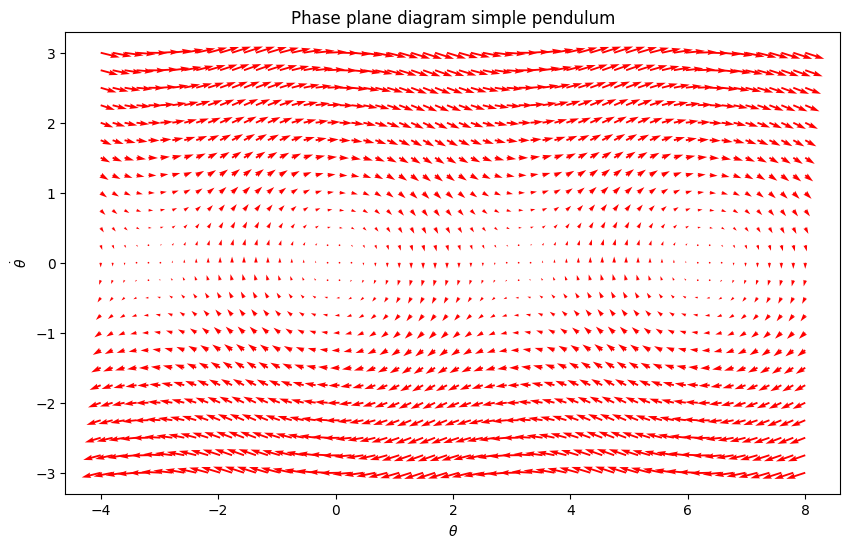

In [6]:
fig1,ax1=plt.subplots(figsize=(10,6))
ax1.quiver(Q,Qdot,dot_Q,dot_Qdot,color='r')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\dot{\theta}$')
plt.title('Phase plane diagram simple pendulum')

Text(0.5, 1.0, 'Phase plane diagram simple pendulum')

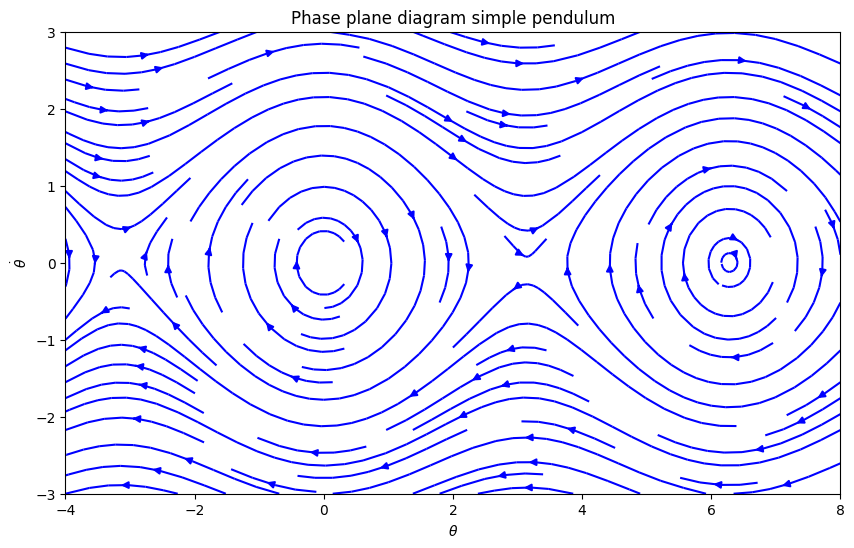

In [7]:
fig2,ax2=plt.subplots(figsize=(10,6))
ax2.streamplot(Q,Qdot,dot_Q,dot_Qdot,color='b')
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\dot{\theta}$')
plt.title('Phase plane diagram simple pendulum')

Numerical solution to the first order system of equations of motion

In [8]:
from scipy.integrate import odeint

Time frame

In [10]:
t0,tmax,dt=0.0,30.0,0.01 #Initial time, final time, step (s)
time=np.arange(t0,tmax+dt,dt)
time

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 2.998e+01, 2.999e+01,
       3.000e+01])

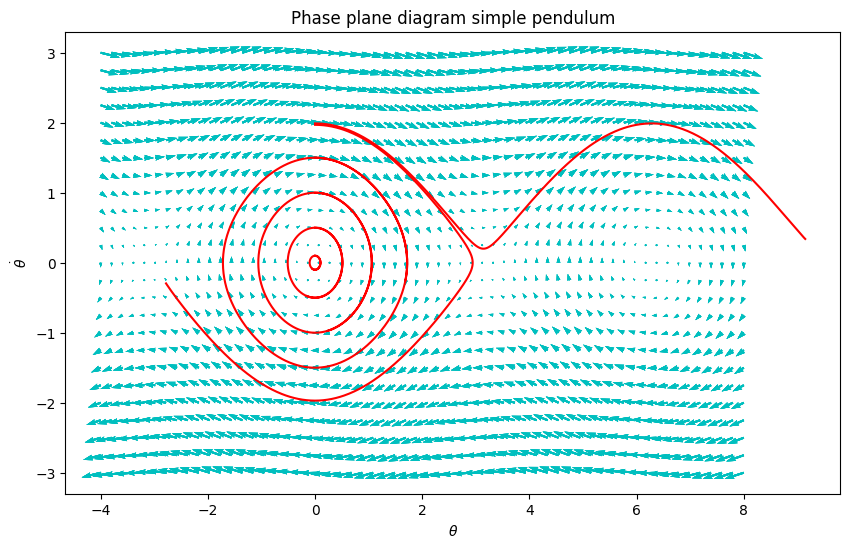

In [31]:
fig3,ax3=plt.subplots(figsize=(10,6))
for S0 in[[0.0,0.1],[0.0,0.5],[0.0,1.0],[0.0,1.5],[0.0,1.97],[0.0,1.99]]:
  answer=odeint(derivatives,S0,time)
  ax3.plot(answer[:1000,0],answer[:1000,1],'r') # solution
  ax3.quiver(Q,Qdot,dot_Q,dot_Qdot,color='c')
  ax3.set_xlabel(r'$\theta$')
  ax3.set_ylabel(r'$\dot{\theta}$')
  plt.title('Phase plane diagram simple pendulum')